In [1]:
# -*- coding: utf-8 -*-

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
np.random.seed(123)

df=pd.read_csv(r'C:\luyan\paper_code\data\cluster_schedule_preference_data.csv')



In [2]:
dfwm=df[df['ac_type']=='w_m']
dffs=df[df['ac_type']=='f_s']

id_wm=dfwm['id']
id_fs=dffs['id']

dfwm=df[df['ac_type']=='w_m'].drop(columns=['id','ac_type'])
dffs=df[df['ac_type']=='f_s'].drop(columns=['id','ac_type'])


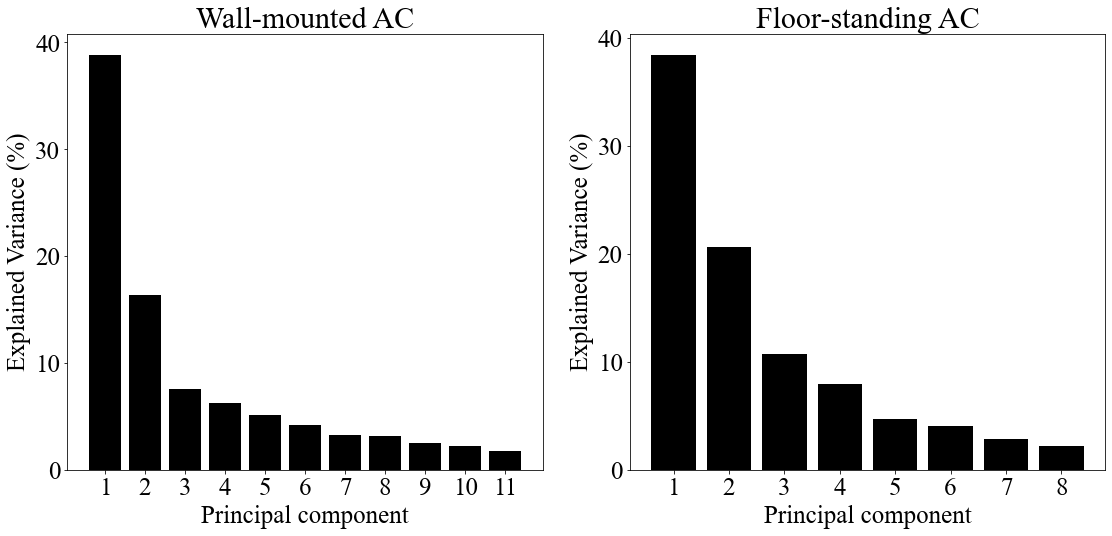

In [3]:
np.random.seed(123)
dfcluster_wm=dfwm
x_std_wm = StandardScaler().fit_transform(dfcluster_wm)
pca_wm = PCA(n_components=0.9)

principalcomponents_wm = pca_wm.fit_transform(x_std_wm)
pca_components_wm = pd.DataFrame(principalcomponents_wm)
# Plot the explained variances

plt.rc("font",family="Times New Roman",size=25)
plt.figure(figsize=(16, 8))
features_wm = range(1,pca_wm.n_components_+1)
ax=plt.subplot(1,2,1)
plt.bar(features_wm, 100*pca_wm.explained_variance_ratio_, color='black')
plt.xlabel('Principal component')
plt.ylabel('Explained Variance (%)')
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.title('Wall-mounted AC')



dfcluster_fs=dffs
x_std_fs = StandardScaler().fit_transform(dfcluster_fs)

pca_fs = PCA(n_components=0.9)

principalcomponents_fs = pca_fs.fit_transform(x_std_fs)
pca_components_fs = pd.DataFrame(principalcomponents_fs)
# Plot the explained variances
features_fs = range(1,pca_fs.n_components_+1)

ax=plt.subplot(1,2,2)
plt.bar(features_fs, 100*pca_fs.explained_variance_ratio_, color='black')
plt.xlabel('Principal component')
plt.ylabel('Explained Variance (%)')
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.title('Floor-standing AC')

plt.tight_layout()
plt.savefig(r'C:\luyan\fig\fig7.jpg',dpi=600)

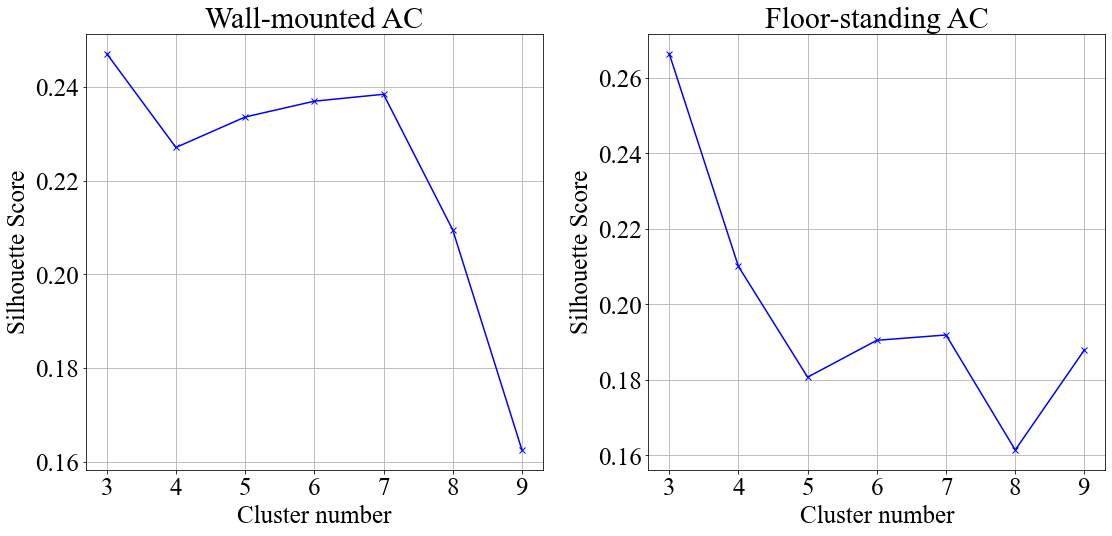

In [4]:
clusters = range(3,10)
sc_scores_wm = []
sc_scores_fs = []
klist=[]
for k in clusters:  
    kmeans_model = KMeans(n_clusters=k).fit(np.array(pca_components_wm))
    sc_score =silhouette_score(np.array(pca_components_wm), kmeans_model.labels_)
    sc_scores_wm.append(sc_score)
    klist.append(k)

for k in clusters:  
    kmeans_model = KMeans(n_clusters=k).fit(np.array(pca_components_fs))
    sc_score =silhouette_score(np.array(pca_components_fs), kmeans_model.labels_)
    sc_scores_fs.append(sc_score)
    klist.append(k)
    

plt.rc("font",family="Times New Roman",size=25)
plt.figure(figsize=(16, 8))
ax=plt.subplot(1,2,1)

ax.xaxis.set_major_locator(MultipleLocator(1))
plt.plot(clusters, sc_scores_wm, 'bx-')

plt.xlabel('Cluster number')
plt.ylabel('Silhouette Score')
plt.xticks()
plt.yticks()
plt.grid(True)
plt.title('Wall-mounted AC')

ax=plt.subplot(1,2,2)

ax.xaxis.set_major_locator(MultipleLocator(1))
plt.plot(clusters, sc_scores_fs, 'bx-')

plt.xlabel('Cluster number')
plt.ylabel('Silhouette Score')
plt.xticks()
plt.yticks()
plt.grid(True)
plt.title('Floor-standing AC')

plt.savefig(r'C:\luyan\fig\fig8.jpg',dpi=600)
plt.tight_layout()


In [5]:
np.random.seed(123)
labels_wm = KMeans(n_clusters=3).fit(np.array(pca_components_wm)).labels_

n_counts_wm=pd.crosstab(labels_wm,labels_wm)

dflabel_wm=pd.DataFrame()
dflabel_wm['id']=id_wm
dflabel_wm['schedule_type']=labels_wm


dfcluster_result_wm=pd.merge(dflabel_wm,df,on='id')

dfcluster_center_wm=dfcluster_result_wm.groupby('schedule_type').mean()
dfcluster_result_wm
dfcluster_center_wm

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
schedule_type,,,,,,,,,,,,,,,,,,,,,
0,0.036014,0.028234,0.019133,0.013518,0.010896,0.010691,0.010973,0.012599,0.019054,0.029620,...,0.062635,0.055720,0.058626,0.056445,0.054599,0.060055,0.059346,0.068648,0.066363,0.055843
1,0.081884,0.091083,0.097763,0.082585,0.071518,0.076975,0.070237,0.050720,0.032954,0.026184,...,0.015032,0.014141,0.012365,0.009794,0.010232,0.012289,0.018690,0.035713,0.056985,0.073528
2,0.058464,0.060627,0.061638,0.052162,0.045142,0.048474,0.044640,0.036343,0.030654,0.029505,...,0.038540,0.038328,0.036438,0.034272,0.031386,0.030485,0.035384,0.046106,0.054560,0.057525


In [6]:
np.random.seed(123)
labels_fs = KMeans(n_clusters=3).fit(np.array(pca_components_fs)).labels_

n_counts_fs=pd.crosstab(labels_fs,labels_fs)

dflabel_fs=pd.DataFrame()
dflabel_fs['id']=id_fs
dflabel_fs['schedule_type']=labels_fs



dfcluster_result_fs=pd.merge(dflabel_fs,df,on='id')

dfcluster_center_fs=dfcluster_result_fs.groupby('schedule_type').mean()
dfcluster_result_fs
dfcluster_center_fs

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
schedule_type,,,,,,,,,,,,,,,,,,,,,
0,0.053856,0.052040,0.052468,0.044754,0.038154,0.039176,0.036649,0.029356,0.028047,0.031583,...,0.036099,0.037140,0.037035,0.039655,0.044295,0.045553,0.049151,0.053788,0.057771,0.055777
1,0.043576,0.025406,0.014996,0.010896,0.008015,0.006888,0.006626,0.008164,0.010573,0.012378,...,0.043108,0.042898,0.044753,0.055050,0.071353,0.088185,0.104290,0.111555,0.100836,0.073693
2,0.018925,0.011726,0.010307,0.009930,0.009165,0.006662,0.007494,0.010237,0.017042,0.026720,...,0.068401,0.065895,0.067303,0.070174,0.074326,0.071462,0.070471,0.066904,0.052682,0.035163


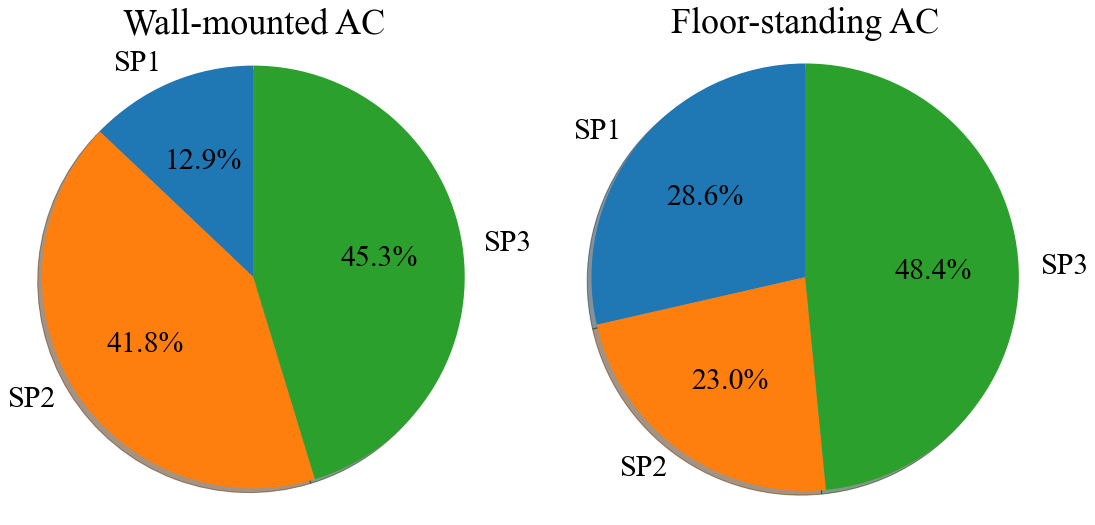

In [7]:
dis_wm=np.array(n_counts_wm).flatten()
dis_wm=dis_wm[dis_wm!=0]
labels_wm = 'SP1', 'SP2', 'SP3'
dis_fs=np.array(n_counts_fs).flatten()
dis_fs=dis_fs[dis_fs!=0]
labels_fs = 'SP1', 'SP2', 'SP3'

plt.rc("font",family="Times New Roman",size=30)
fig,ax= plt.subplots(1,2,figsize=(16,8))
ax[0].pie(dis_wm, labels=labels_wm, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title('Wall-mounted AC')

ax[1].pie(dis_fs, labels=labels_fs, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_title('Floor-standing AC')
plt.tight_layout()
plt.show()

In [8]:

def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)



<ipython-input-14-0d2308f7b69b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
<ipython-input-14-0d2308f7b69b>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
<ipython-input-14-0d2308f7b69b>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])


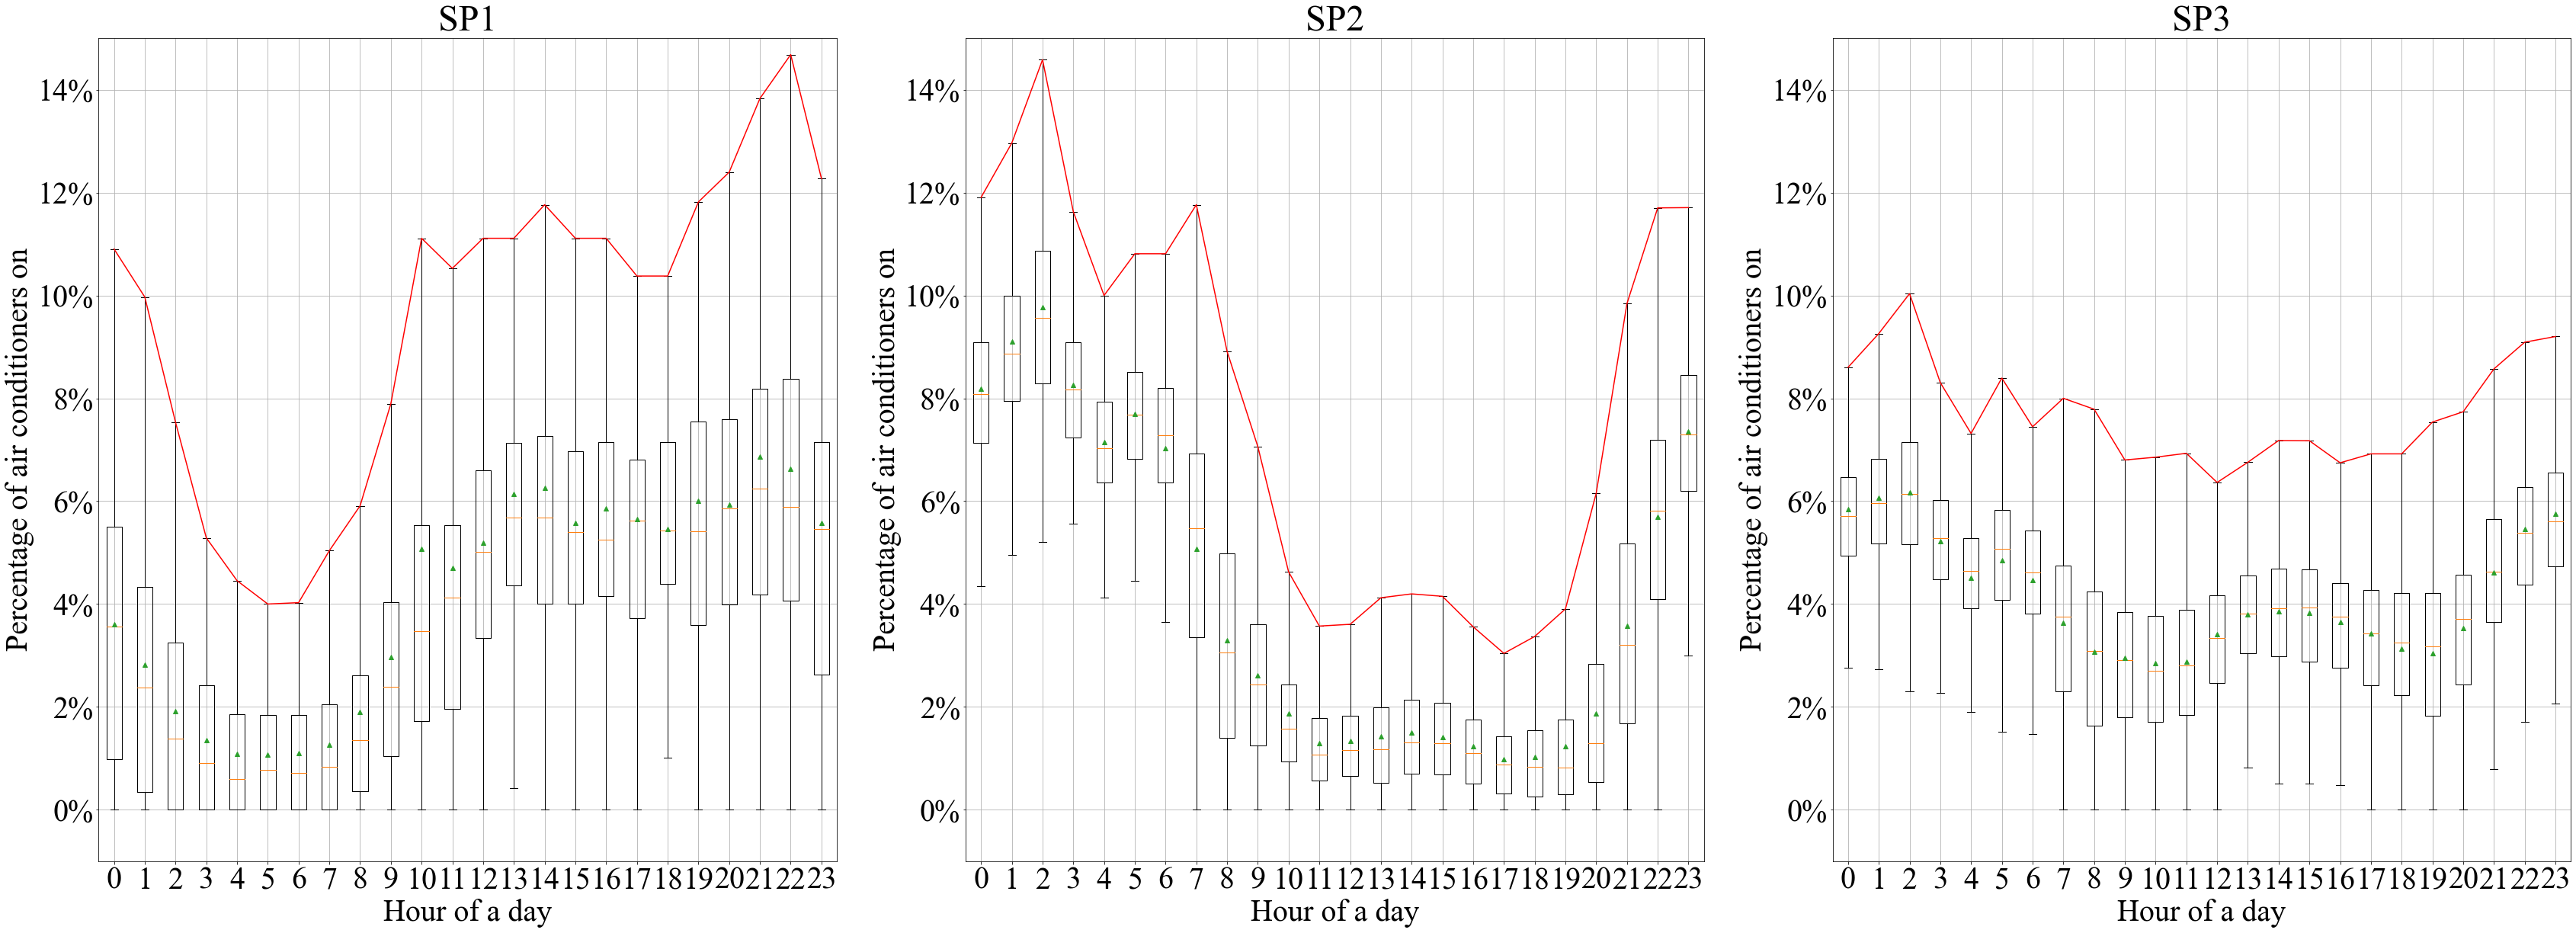

In [14]:
df0_wm=dfcluster_result_wm[dfcluster_result_wm['schedule_type']==0].iloc[:,2:26]
df1_wm=dfcluster_result_wm[dfcluster_result_wm['schedule_type']==1].iloc[:,2:26]
df2_wm=dfcluster_result_wm[dfcluster_result_wm['schedule_type']==2].iloc[:,2:26]

labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']


plt.rc("font",family="Times New Roman",size=40)

labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']


fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(48,18))

bp=ax[0].boxplot(np.array(df0_wm),labels=labels,showmeans=True,showfliers=False)
upline0_wm=get_box_plot_data(labels, bp)['upper_whisker']
ax[0].plot(np.arange(1,25),upline0_wm,'r-')
ax[0].set_ylim(-0.01,0.15)
vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax[0].set_title('SP1')
ax[0].set_ylabel('Percentage of air conditioners on')
ax[0].set_xlabel('Hour of a day')
ax[0].grid(True)


bp=ax[1].boxplot(np.array(df1_wm),labels=labels,showmeans=True,showfliers=False)
upline1_wm=get_box_plot_data(labels, bp)['upper_whisker']
ax[1].plot(np.arange(1,25),upline1_wm,'r-')
ax[1].set_ylim(-0.01,0.15)
vals = ax[1].get_yticks()
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax[1].set_title('SP2')
ax[1].set_ylabel('Percentage of air conditioners on')
ax[1].set_xlabel('Hour of a day')
ax[1].grid(True)


bp=ax[2].boxplot(np.array(df2_wm),labels=labels,showmeans=True,showfliers=False)
upline2_wm=get_box_plot_data(labels, bp)['upper_whisker']
ax[2].plot(np.arange(1,25),upline2_wm,'r-')
ax[2].set_ylim(-0.01,0.15)
vals = ax[2].get_yticks()
ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax[2].set_title('SP3')
ax[2].set_ylabel('Percentage of air conditioners on')
ax[2].set_xlabel('Hour of a day')
ax[2].grid(True)
plt.tight_layout()
plt.savefig(r'C:\luyan\fig\fig9a.jpg',dpi=600)

<ipython-input-15-d879d4fd5cd9>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
<ipython-input-15-d879d4fd5cd9>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
<ipython-input-15-d879d4fd5cd9>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])


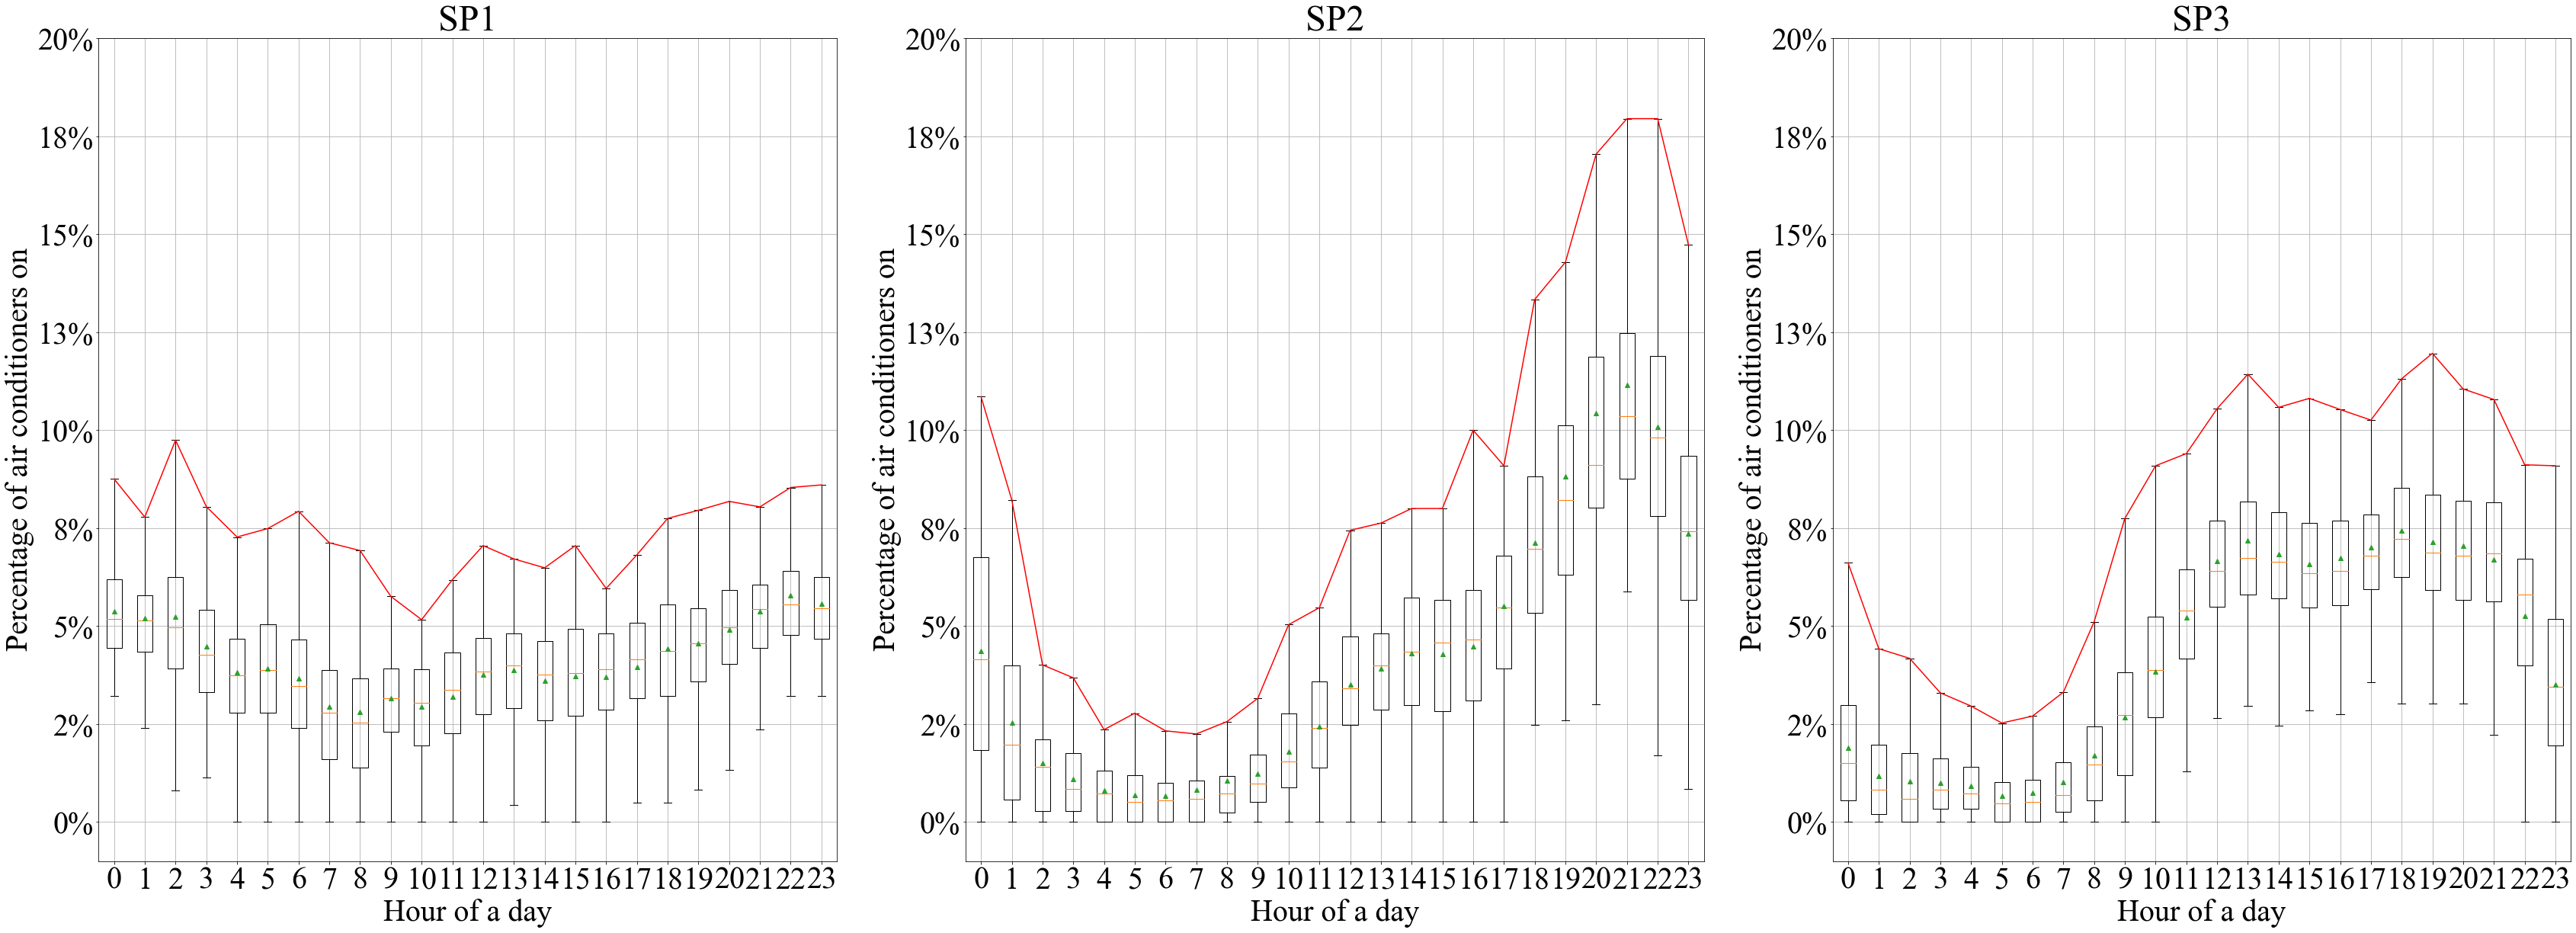

In [15]:
df0_fs=dfcluster_result_fs[dfcluster_result_fs['schedule_type']==0].iloc[:,2:26]
df1_fs=dfcluster_result_fs[dfcluster_result_fs['schedule_type']==1].iloc[:,2:26]
df2_fs=dfcluster_result_fs[dfcluster_result_fs['schedule_type']==2].iloc[:,2:26]

labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']


plt.rc("font",family="Times New Roman",size=40)

labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']


fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(48,18))


bp=ax[0].boxplot(np.array(df0_fs),labels=labels,showmeans=True,showfliers=False)
upline0_fs=get_box_plot_data(labels, bp)['upper_whisker']
ax[0].plot(np.arange(1,25),upline0_fs,'r-')
ax[0].set_ylim(-0.01,0.20)
vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax[0].set_title('SP1')
ax[0].set_ylabel('Percentage of air conditioners on')
ax[0].set_xlabel('Hour of a day')
ax[0].grid(True)


bp=ax[1].boxplot(np.array(df1_fs),labels=labels,showmeans=True,showfliers=False)
upline1_fs=get_box_plot_data(labels, bp)['upper_whisker']
ax[1].plot(np.arange(1,25),upline1_fs,'r-')
ax[1].set_ylim(-0.01,0.20)
vals = ax[1].get_yticks()
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax[1].set_title('SP2')
ax[1].set_ylabel('Percentage of air conditioners on')
ax[1].set_xlabel('Hour of a day')
ax[1].grid(True)



bp=ax[2].boxplot(np.array(df2_fs),labels=labels,showmeans=True,showfliers=False)
upline2_fs=get_box_plot_data(labels, bp)['upper_whisker']
ax[2].plot(np.arange(1,25),upline2_fs,'r-')
ax[2].set_ylim(-0.01,0.20)
vals = ax[2].get_yticks()
ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax[2].set_title('SP3')
ax[2].set_ylabel('Percentage of air conditioners on')
ax[2].set_xlabel('Hour of a day')
ax[2].grid(True)
plt.tight_layout()
plt.savefig(r'C:\luyan\fig\fig9b.jpg',dpi=600)

In [12]:
#dfcluster_result_wm.to_csv(r'C:\luyan\paper_code\data\schedule_cluster_label_wm.csv')
#dfcluster_result_fs.to_csv(r'C:\luyan\paper_code\data\schedule_cluster_label_fs.csv')
dfcluster_result_wm.head(5)


,id,schedule_type,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,ac_type
0,0007A88BA9B4,2,0.067568,0.060811,0.054054,0.033784,0.027027,0.040541,0.040541,0.033784,...,0.060811,0.027027,0.013514,0.000000,0.000000,0.033784,0.033784,0.047297,0.060811,w_m
1,0007A88BCE80,2,0.071283,0.069246,0.071283,0.052953,0.046843,0.036660,0.036660,0.034623,...,0.028513,0.026477,0.026477,0.038697,0.046843,0.046843,0.059063,0.071283,0.069246,w_m
2,0007A88BEB1B,2,0.061350,0.073620,0.073620,0.067485,0.055215,0.073620,0.067485,0.055215,...,0.036810,0.042945,0.036810,0.012270,0.012270,0.006135,0.036810,0.061350,0.067485,w_m
3,0007A88C1F67,2,0.056098,0.060976,0.063415,0.052439,0.047561,0.053659,0.048780,0.047561,...,0.054878,0.050000,0.037805,0.018293,0.004878,0.003659,0.041463,0.059756,0.059756,w_m
4,0007A88C23D9,1,0.063380,0.075117,0.079812,0.068075,0.063380,0.068075,0.065728,0.063380,...,0.030516,0.023474,0.021127,0.016432,0.011737,0.030516,0.039906,0.051643,0.063380,w_m


In [13]:
dfcluster_result_fs.head(5)

,id,schedule_type,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,ac_type
0,0007A88A4D8D,0,0.058065,0.051613,0.059677,0.040323,0.041935,0.040323,0.035484,0.038710,...,0.027419,0.030645,0.032258,0.030645,0.024194,0.029032,0.040323,0.051613,0.056452,f_s
1,0007A88B9A54,1,0.058140,0.037791,0.029070,0.020349,0.023256,0.020349,0.023256,0.020349,...,0.020349,0.020349,0.023256,0.049419,0.072674,0.087209,0.098837,0.104651,0.104651,f_s
2,0007A88B9C97,0,0.059441,0.052448,0.055944,0.052448,0.055944,0.055944,0.055944,0.010490,...,0.020979,0.020979,0.024476,0.031469,0.038462,0.073427,0.080420,0.097902,0.090909,f_s
3,0007A88BE35D,2,0.000000,0.000000,0.000000,0.002058,0.002058,0.000000,0.000000,0.002058,...,0.067901,0.078189,0.082305,0.084362,0.084362,0.086420,0.090535,0.086420,0.041152,f_s
4,0007A88C5912,2,0.020833,0.020833,0.020833,0.022436,0.019231,0.022436,0.019231,0.017628,...,0.048077,0.052885,0.062500,0.068910,0.068910,0.075321,0.073718,0.070513,0.048077,f_s
